# 机器学习练习 1 - 多变量线性回归

In [120]:
import math, copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 数据进行处理
- 使用panda 从当前目录下读取文件
- 并为其设置列名称Size 和 Bedrooms 以及Profit

In [121]:
path =  './multi_variable_linear_regression.txt'
data = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])

- 查看文件头,默认展示前5行

In [122]:
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


- 查看数据详情格式

In [123]:
data.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


- 绘制数据

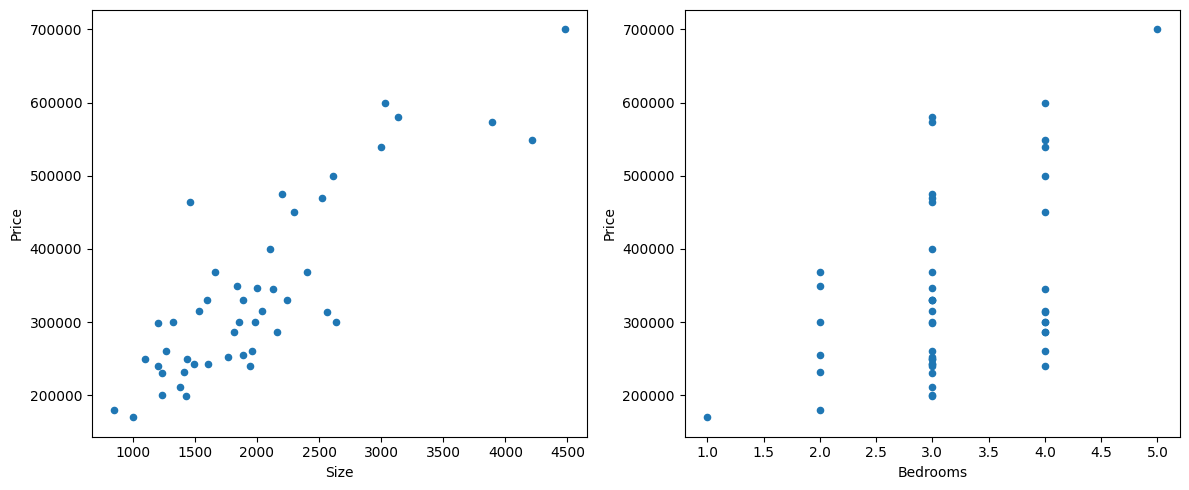

In [124]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
data.plot.scatter(x='Size', y='Price', ax=axes[0])
data.plot.scatter(x='Bedrooms', y='Price', ax=axes[1])
plt.tight_layout()
plt.show()

## 使用Z-Score归一化处理

-  由于bedrooms 和 siz 的差异十分大，所以需要做归一化处理

### Z-Score 归一化公式

**公式：**  
$$
z = \frac{x - \mu}{\sigma}
$$

**其中：**  
- $x$：原始数据值  
- $\mu$：均值（$\mu = \frac{1}{n}\sum_{i=1}^n x_i$）  
- $\sigma$：标准差（$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n (x_i - \mu)^2}$）

### 对data进行归一化处理

In [125]:
# 计算均值和标准差
mean = data.mean()
std = data.std()

In [126]:
# 进行 Z-Score 归一化
data_normalized = (data - mean) / std
# 查看归一化后的数据
data_normalized.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


## 线性回归

<a name="toc_40291_2.1"></a>
## Gradient descent summary

So far in this course, you have developed a linear model that predicts $f_{\vec{w},b}(\vec{x})$:
$$f_{\vec{w},b}(\vec{x}) = \vec{w} \cdot \vec{x} + b \tag{1}$$

In linear regression, you utilize input training data to fit the parameters $\vec{w}$,$b$ by minimizing a measure of the error between our predictions $f_{\vec{w},b}(\vec{x}^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(\vec{w},b)$. In training you measure the cost over all of our training samples $\vec{x}^{(i)},y^{(i)}$

$$J(\vec{w},b) = \frac{1}{2m} \sum\limits_{i = 1}^{m} (f_{\vec{w},b}(\vec{x}^{(i)}) - y^{(i)})^2\tag{2}$$ 

*gradient descent* was described as:

$$\begin{align*} 
\text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  {w_j} &= {w_j} -  \alpha \frac{\partial J(\vec{w},b)}{\partial {w_j}} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(\vec{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where parameters $\vec{w}$, $b$ are updated simultaneously.  
The gradient is defined as:

$$
\begin{align}
\frac{\partial J(\vec{w},b)}{\partial {w}}  &= \frac{1}{m} \sum\limits_{i = 1}^{m} (f_{\vec{w},b}(\vec{x}^{(i)}) - y^{(i)})\vec{x_j}^{(i)} \tag{4}\\
\frac{\partial J(\vec{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 1}^{m} (f_{\vec{w},b}(\vec{x}^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaneously* means that you calculate the partial derivatives for all parameters before updating any parameters.

- 根据公式2 定义cost funtion如下

In [127]:
def compute_cost_matrix(X, y, w, b):
    """
    Computes the gradient for linear regression
     Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      verbose : (Boolean) If true, print out intermediate value f_wb
    Returns
      cost: (scalar)
    """
    
    m,n = X.shape
    # shape->(m,)
    f_wb = X @ w + b

    # 两个向量相减然后平方求和
    total_cost = (1 / (2 * m)) * np.sum((f_wb-y)**2)

    return total_cost

- 根据公式4和5计算gradient

In [300]:
def compute_gradient_matrix(X, y, w, b): 
    """
    Computes the gradient for linear regression

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
    Returns
      dj_dw (ndarray (n,1)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar):        The gradient of the cost w.r.t. the parameter b.

    """
    
    # Number of training examples
    m,n = X.shape   
    dj_dw = 0
    dj_db = 0
    print(f"X shape:{X.shape}")
    print(f"w shape:{w.shape}")
    # shape->(m,)
    f_wb = X @ w + b
    print(f"f_wb shape:{f_wb.shape}")
    # shape->(m,)
    e = f_wb - y
    print(f"e shape:{e.shape}")
    # (n,m) * (m,) => (n,)
    dj_dw = (1 / m) * (X.T @ e)
    dj_db = (1 / m) * np.sum(e)
        
    return dj_dw, dj_db

- Gradient Descent递减函数实现

In [301]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))  : Data, m examples with n features
      y (ndarray (m,))  : target values
      w (ndarray (n,)) : model parameters 
      b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (ndarray (n,)): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      w_history (list): History of parameters [w] 
      b_history (list): History of parameters [b] 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    b_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(X, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i < 100000:      # prevent resource exhaustion 
            J_history.append(cost_function(X, y, w , b))
            w_history.append(w)
            b_history.append(b)
            
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == num_iters - 1:
        # 每50次迭代会打印一次
        # if i % 50 == 0 or i == num_iters - 1: 
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

## 开始学习求w 和 b

- 数据操作转换成x和y矩阵

In [302]:
# set X (training data) and y (target variable)
cols = data_normalized.shape[1]

In [303]:
x_train = data_normalized.iloc[:,0:cols-1]

In [304]:
x_train.head()

,Size,Bedrooms
0,0.130010,-0.223675
1,-0.504190,-0.223675
2,0.502476,-0.223675
3,-0.735723,-1.537767
4,1.257476,1.090417


In [305]:
# x_train.values 是一个(47, 2)的矩阵
x_train = np.matrix(x_train.values)

In [306]:
x_train.shape
print(f"x_train = {x_train}")

x_train = [[ 1.30009869e-01 -2.23675187e-01]
 [-5.04189838e-01 -2.23675187e-01]
 [ 5.02476364e-01 -2.23675187e-01]
 [-7.35723065e-01 -1.53776691e+00]
 [ 1.25747602e+00  1.09041654e+00]
 [-1.97317285e-02  1.09041654e+00]
 [-5.87239800e-01 -2.23675187e-01]
 [-7.21881404e-01 -2.23675187e-01]
 [-7.81023044e-01 -2.23675187e-01]
 [-6.37573110e-01 -2.23675187e-01]
 [-7.63567023e-02  1.09041654e+00]
 [-8.56737193e-04 -2.23675187e-01]
 [-1.39273340e-01 -2.23675187e-01]
 [ 3.11729182e+00  2.40450826e+00]
 [-9.21956312e-01 -2.23675187e-01]
 [ 3.76643089e-01  1.09041654e+00]
 [-8.56523009e-01 -1.53776691e+00]
 [-9.62222960e-01 -2.23675187e-01]
 [ 7.65467909e-01  1.09041654e+00]
 [ 1.29648433e+00  1.09041654e+00]
 [-2.94048269e-01 -2.23675187e-01]
 [-1.41790005e-01 -1.53776691e+00]
 [-4.99156507e-01 -2.23675187e-01]
 [-4.86733818e-02  1.09041654e+00]
 [ 2.37739217e+00 -2.23675187e-01]
 [-1.13335621e+00 -2.23675187e-01]
 [-6.82873089e-01 -2.23675187e-01]
 [ 6.61026291e-01 -2.23675187e-01]
 [ 2.50809

In [307]:
# y_train.values 是一个(47, 1)的矩阵
y_train.shape

(47,)

In [308]:
y_train = data_normalized.iloc[:,cols-1:cols]
#print(y_train)

In [309]:
y_train.head()

,Price
0,0.475747
1,-0.084074
2,0.228626
3,-0.867025
4,1.595389


In [310]:
print(f"y_train = {y_train}")

y_train =        Price
0   0.475747
1  -0.084074
2   0.228626
3  -0.867025
4   1.595389
5  -0.323998
6  -0.204036
7  -1.130948
8  -1.026973
9  -0.783051
10 -0.803053
11  0.052682
12 -0.083283
13  2.874981
14 -0.643896
15  0.875619
16 -0.323998
17 -1.123743
18  1.276275
19  2.068039
20 -0.699878
21 -0.683083
22 -0.779852
23 -0.643896
24  1.867303
25 -0.723870
26  0.992382
27  1.028370
28  1.076355
29 -0.323998
30  0.075875
31 -1.363666
32 -0.204036
33  1.915287
34 -0.435962
35 -0.723870
36 -0.883819
37  0.036687
38  1.668166
39 -0.427165
40  0.224627
41 -0.084074
42 -0.211234
43 -0.331196
44 -1.283692
45 -0.323998
46 -0.807044


In [311]:
# 将其拉成一维向量
y_train = y_train.values.reshape(-1)

In [312]:
y_train.shape

(47,)

In [313]:
print(f"y_train = {y_train}")

y_train = [ 0.47574687 -0.08407444  0.22862575 -0.86702453  1.59538948 -0.32399786
 -0.20403615 -1.13094828 -1.02697347 -0.78305133 -0.80305294  0.05268191
 -0.08328269  2.87498104 -0.64389575  0.87561923 -0.32399786 -1.12374258
  1.27627534  2.06803861 -0.69987788 -0.68308324 -0.77985235 -0.64389575
  1.86730269 -0.72387022  0.99238196  1.02837047  1.07635515 -0.32399786
  0.0758745  -1.363666   -0.20403615  1.91528737 -0.43596212 -0.72387022
 -0.88381916  0.03668701  1.66816625 -0.42716493  0.22462702 -0.08407444
 -0.21123385 -0.33119556 -1.28369153 -0.32399786 -0.80704367]


In [314]:
# 初始化w_init为和x_train.values 列一样的向量
w_init = np.zeros(x_train.shape[1])

In [315]:
print(w_init)

[0. 0.]


In [316]:
w_init.shape

(2,)

In [317]:
# initialize parameters
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost_matrix, compute_gradient_matrix)
print(f"(w,b) found by gradient descent: ({w_final},{b_final:8.4f})")

X shape:(47, 2)
w shape:(2,)
f_wb shape:(1, 47)
e shape:(1, 47)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 47)

- 绘制学习迭代曲线

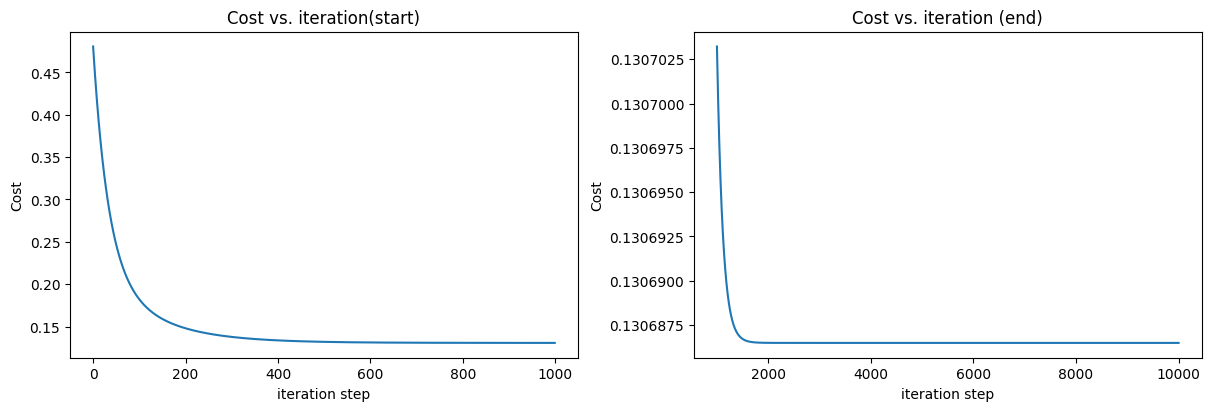

In [211]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:1000]) #前100次迭代
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:]) # 后面的迭代
ax1.set_title("Cost vs. iteration(start)");  
ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  
ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  
ax2.set_xlabel('iteration step') 
plt.show()

- 绘制拟合后的曲线

[ 753.76744283  786.17096563  818.57448842  850.97801122  883.38153401
  915.78505681  948.1885796   980.5921024  1012.99562519 1045.39914799
 1077.80267078 1110.20619358 1142.60971637 1175.01323916 1207.41676196
 1239.82028475 1272.22380755 1304.62733034 1337.03085314 1369.43437593
 1401.83789873 1434.24142152 1466.64494432 1499.04846711 1531.45198991
 1563.8555127  1596.2590355  1628.66255829 1661.06608109 1693.46960388
 1725.87312668 1758.27664947 1790.68017227 1823.08369506 1855.48721786
 1887.89074065 1920.29426344 1952.69778624 1985.10130903 2017.50483183
 2049.90835462 2082.31187742 2114.71540021 2147.11892301 2179.5224458
 2211.9259686  2244.32949139 2276.73301419 2309.13653698 2341.54005978
 2373.94358257 2406.34710537 2438.75062816 2471.15415096 2503.55767375
 2535.96119655 2568.36471934 2600.76824214 2633.17176493 2665.57528772
 2697.97881052 2730.38233331 2762.78585611 2795.1893789  2827.5929017
 2859.99642449 2892.39994729 2924.80347008 2957.20699288 2989.61051567
 3022.01

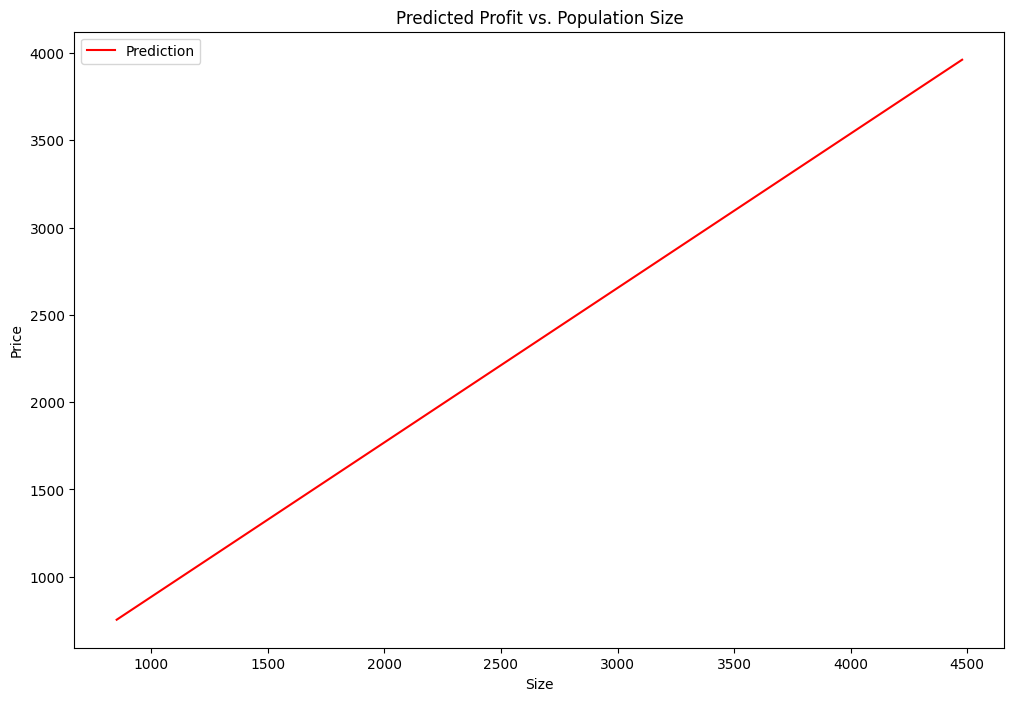

In [214]:
x_size = np.linspace(data.Size.min(), data.Size.max(), 100)
x_bedrooms = np.linspace(data.Bedrooms.min(), data.Bedrooms.max(), 100)

f_wb = (w_final[0] * x_size) + (w_final[1] * x_bedrooms) + b_final

print(f_wb)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x_size, f_wb, 'r', label='Prediction')
#ax.scatter(data.Size, data.Bedrooms, data.Price, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Size')
ax.set_ylabel('Price')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()